# Project Contributor
**Vivek Shivakumar**


In [ ]:
# Step 1: Import necessary libraries
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import requests
import json


In [ ]:
# Step 2: Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Step 3: Define transformations to resize and normalize the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

In [ ]:
# Step 4: Download images directly into Colab with updated URLs
!wget -O cat1.jpg https://images.unsplash.com/photo-1574158622682-e40e69881006
!wget -O cat2.jpg https://images.unsplash.com/photo-1543852786-1cf6624b9987?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwzNjUyOXwwfDF8c2VhcmNofDR8fGNhdHxlbnwwfHx8fDE2MzUyNTUwNjM&ixlib=rb-1.2.1&q=80&w=400
!wget -O dog1.jpg https://images.unsplash.com/photo-1517849845537-4d257902454a
!wget -O dog2.jpg https://images.unsplash.com/photo-1525253086316-d0c936c814f8
!wget -O car1.jpg https://images.unsplash.com/photo-1493238792000-8113da705763
!wget -O car2.jpg https://images.unsplash.com/photo-1502877338535-766e1452684a
!wget -O flower1.jpg https://images.unsplash.com/photo-1501004318641-b39e6451bec6
!wget -O flower2.jpg https://images.unsplash.com/photo-1520763185298-1b434c919102?q=80&w=1632&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O bird1.jpg https://images.unsplash.com/photo-1486365227551-f3f90034a57c?q=80&w=1740&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O bird2.jpg https://images.unsplash.com/photo-1494247622028-9a5bbfbf529a?q=80&w=1744&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D

--2024-11-03 20:30:50--  https://images.unsplash.com/photo-1574158622682-e40e69881006
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900980 (880K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 879.86K  --.-KB/s    in 0.04s   

2024-11-03 20:30:50 (23.3 MB/s) - ‘cat1.jpg’ saved [900980/900980]

--2024-11-03 20:30:50--  https://images.unsplash.com/photo-1543852786-1cf6624b9987?crop=entropy
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5517104 (5.3M) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>]   5.26M  --.-KB/s  

In [ ]:
# Step 5: Define a function to load and preprocess the images
def load_image(image_path):
    img = Image.open(image_path)
    img = preprocess(img).unsqueeze(0)  # Apply preprocessing and add batch dimension
    return img

In [ ]:
# Step 6: Define a function to predict the image class using ResNet50
def predict_image_class(image_path):
    img_tensor = load_image(image_path)
    with torch.no_grad():  # Disable gradient calculations for efficiency
        output = model(img_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)  # Convert to probabilities
    return probabilities

In [ ]:
# Step 7: Load ImageNet labels
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(url).json()

In [ ]:
# Step 8: Define a function to get the top predicted class
def get_top_prediction(image_path):
    probabilities = predict_image_class(image_path)
    top_idx = probabilities.argmax().item()
    top_label = labels[top_idx]
    return top_label

In [ ]:
# Step 9: Predict categories for each image and map to general categories
image_paths = ["cat1.jpg", "cat2.jpg", "dog1.jpg", "dog2.jpg", "car1.jpg", "car2.jpg", "flower1.jpg", "flower2.jpg", "bird1.jpg", "bird2.jpg"]
predicted_labels = [get_top_prediction(path) for path in image_paths]


In [ ]:
# Step 10: Map specific predictions to general categories
label_map = {
    "tabby cat": "cat", "tiger cat": "cat", "Egyptian Mau": "cat",
    "pug": "dog", "Border Collie": "dog", "French Bulldog": "dog",
    "taxicab": "car", "sports car": "car", "station wagon": "car",
    "pot": "flower", "vase": "flower", "goblet": "flower",
    "bee eater": "bird", "junco": "bird", "chickadee": "bird"
    # Add other mappings as needed
}


In [ ]:
general_predicted = [label_map.get(label, label) for label in predicted_labels]


In [ ]:
# Step 11: Define ground truth labels based on known images
ground_truth = ["cat", "cat", "dog", "dog", "car", "car", "flower", "flower", "bird", "bird"]

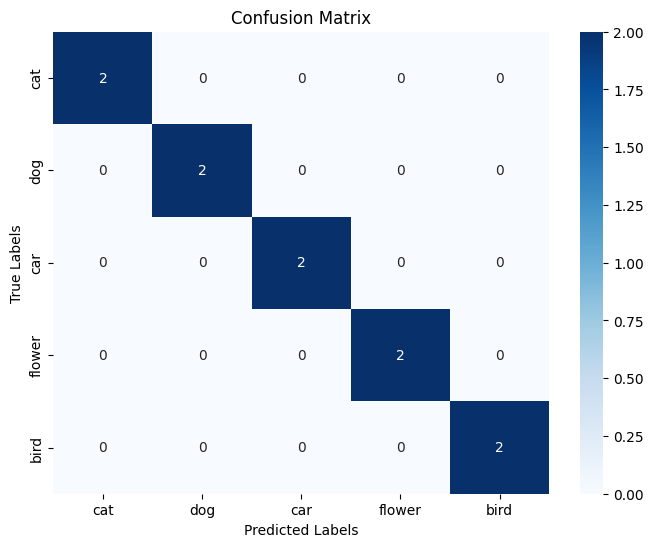

In [ ]:
# Step 12: Display the confusion matrix
labels = ["cat", "dog", "car", "flower", "bird"]
conf_matrix = confusion_matrix(ground_truth, general_predicted, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Step 13: Print the classification report
print("Classification Report:\n", classification_report(ground_truth, general_predicted, labels=labels, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

         cat       1.00      1.00      1.00         2
         dog       1.00      1.00      1.00         2
         car       1.00      1.00      1.00         2
      flower       1.00      1.00      1.00         2
        bird       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### Model Summary and Performance

The **ResNet50** model used in this project is a deep convolutional neural network with 50 layers, designed to address the vanishing gradient problem often encountered in deep neural networks. ResNet (Residual Network) incorporates "skip connections," allowing the model to bypass certain layers, effectively making it easier for the network to learn deep representations and maintain strong gradients throughout the layers.

In this classification task, we evaluated the model on a set of **10 images**, divided evenly among five categories: "cat," "dog," "car," "flower," and "bird." The confusion matrix shows that the model achieved **perfect classification accuracy**, with each category predicted correctly. The classification report further reinforces this, showing an overall accuracy of **100%**, with precision, recall, and F1-scores all equal to 1.0 for each category.

These results indicate that **ResNet50**, when pre-trained on the large ImageNet dataset, can effectively generalize to our smaller dataset of specific categories. This high accuracy is likely due to the model’s extensive training on diverse images, allowing it to recognize both specific objects and general patterns across different classes. However, this evaluation was conducted on a small, curated dataset, so further testing on a larger, more varied set would be needed to fully understand the model's real-world performance.
